In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\ASUS\Downloads\Amazon Sale Report.csv")
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


# Data Cleaning

In [3]:
# Finding the total null values of each column
df.isna().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [4]:
df.nunique()

index                 128975
Order ID              120378
Date                      91
Status                    13
Fulfilment                 2
Sales Channel              2
ship-service-level         2
Style                   1377
SKU                     7195
Category                   9
Size                      11
ASIN                    7190
Courier Status             3
Qty                       10
currency                   1
Amount                  1410
ship-city               8955
ship-state                69
ship-postal-code        9459
ship-country               1
promotion-ids           5787
B2B                        2
fulfilled-by               1
Unnamed: 22                1
dtype: int64

In [5]:
for i in df.columns:
    print('\n',i)
    print('\n',df[i].unique())


 index

 [     0      1      2 ... 128972 128973 128974]

 Order ID

 ['405-8078784-5731545' '171-9198151-1101146' '404-0687676-7273146' ...
 '407-9547469-3152358' '402-6184140-0545956' '408-7436540-8728312']

 Date

 ['04-30-22' '04-29-22' '04-28-22' '04-27-22' '04-26-22' '04-25-22'
 '04-24-22' '04-23-22' '04-22-22' '04-21-22' '04-20-22' '04-19-22'
 '04-18-22' '04-17-22' '04-16-22' '04-15-22' '04-14-22' '04-13-22'
 '04-12-22' '04-11-22' '04-10-22' '04-09-22' '04-08-22' '04-07-22'
 '04-06-22' '04-05-22' '04-04-22' '04-03-22' '04-02-22' '04-01-22'
 '03-31-22' '05-31-22' '05-30-22' '05-29-22' '05-28-22' '05-27-22'
 '05-26-22' '05-25-22' '05-24-22' '05-23-22' '05-22-22' '05-21-22'
 '05-20-22' '05-19-22' '05-18-22' '05-17-22' '05-16-22' '05-15-22'
 '05-14-22' '05-13-22' '05-12-22' '05-11-22' '05-10-22' '05-09-22'
 '05-08-22' '05-07-22' '05-06-22' '05-05-22' '05-04-22' '05-03-22'
 '05-02-22' '05-01-22' '06-29-22' '06-28-22' '06-27-22' '06-26-22'
 '06-25-22' '06-24-22' '06-23-22' '06-22-22'

In [6]:
#Rows and Order IDs are not same ,Order Ids should be unique So dropping duplicates
df.drop_duplicates(subset='Order ID',inplace=True)

In [7]:
# Index and Unnamed column are extras we dont need so dropping both columns
df.drop(['index','Unnamed: 22'],axis=1,inplace=True)

In [8]:
#fulfilled column have only one value that is easy ship so giving that name only
df['fulfilled-by']=df['fulfilled-by'].fillna('Easy Ship')

In [9]:
# All the promotion ids are mentioned rest doesnt have any promo
df['promotion-ids'].fillna('No Promo',inplace=True)

In [10]:
# Ship city , state , postal code , country didnt mentioned in 33 rows instead of filling null values dropping that null values make sense
df=df.dropna(subset=['ship-city'])

In [11]:
# All Transaction and Items delivered in india only so every transaction same currency
df['currency']=df['currency'].fillna('INR')

In [12]:
#For the amount column grouping that category and amount column and taking each categories mean value make sense
df['Amount']=df.groupby('Category')['Amount'].transform(lambda x:x.fillna(x.mean()))

In [13]:
print(df['Courier Status'])
print(df['Courier Status'].unique())

0             NaN
1         Shipped
2         Shipped
3             NaN
4         Shipped
           ...   
128970    Shipped
128971    Shipped
128972    Shipped
128973    Shipped
128974    Shipped
Name: Courier Status, Length: 120350, dtype: object
[nan 'Shipped' 'Cancelled' 'Unshipped']


In [14]:
df['ship-postal-code']=df['ship-postal-code'].astype(int)

In [15]:
df.columns = df.columns.str.strip()


In [16]:
# if updated it could not be null values
df['Courier Status']=df['Courier Status'].fillna('Not Updated')

In [17]:
df.isna().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
fulfilled-by          0
dtype: int64

In [18]:
df['ship-state'].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'Gujarat', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'MANIPUR', 'Goa', 'MEGHALAYA', 'GOA',
       'TRIPURA', 'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', 'Delhi',
       'ANDAMAN & NICOBAR ', 'Punjab', 'Rajshthan', 'Manipur',
       'rajasthan', 'Odisha', 'NL', 'Bihar', 'MIZORAM', 'punjab',
       'New Delhi', 'Rajasthan', 'Punjab/Mohali/Zirakpur', 'Puducherry',
       'delhi', 'RJ', 'Chandigarh', 'orissa', 'LAKSHADWEEP', 'goa', 'PB',
       'APO', 'Arunachal Pradesh', 'AR', 'Pondicherry', 'Sikkim',
       'Arunachal pradesh', 'Nagaland', 'bihar', 'Mizoram', 'rajsthan',
       'Orissa', 'Rajsthan', 'Meghalaya'], dtype=object)

In [19]:
df['ship-state']=df['ship-state'].str.strip().str.title()

In [20]:
df['ship-state'].unique()

array(['Maharashtra', 'Karnataka', 'Puducherry', 'Tamil Nadu',
       'Uttar Pradesh', 'Chandigarh', 'Telangana', 'Andhra Pradesh',
       'Rajasthan', 'Delhi', 'Haryana', 'Assam', 'Jharkhand',
       'Chhattisgarh', 'Odisha', 'Kerala', 'Madhya Pradesh',
       'West Bengal', 'Nagaland', 'Gujarat', 'Uttarakhand', 'Bihar',
       'Jammu & Kashmir', 'Punjab', 'Himachal Pradesh',
       'Arunachal Pradesh', 'Manipur', 'Goa', 'Meghalaya', 'Tripura',
       'Ladakh', 'Dadra And Nagar', 'Sikkim', 'Andaman & Nicobar',
       'Rajshthan', 'Nl', 'Mizoram', 'New Delhi',
       'Punjab/Mohali/Zirakpur', 'Rj', 'Orissa', 'Lakshadweep', 'Pb',
       'Apo', 'Ar', 'Pondicherry', 'Rajsthan'], dtype=object)

In [21]:
replace_map = {
    'Pondicherry': 'Puducherry',
    'Puducherry': 'Puducherry',
    'Orissa': 'Odisha',
    'Rajsthan': 'Rajasthan',
    'Rajasthn': 'Rajasthan',
    'Rjasthan': 'Rajasthan',
    'Pb': 'Punjab',
    'Nl': 'Nagaland',
    'Apo': 'Andhra Pradesh',
    'Ar': 'Arunachal Pradesh',
    'Punjab/Mohali/Zirakpur': 'Punjab',
    'Dadra And Nagar': 'Dadra & Nagar Haveli And Daman & Diu',
    'Andaman & Nicobar': 'Andaman & Nicobar Islands',
    'Delhi': 'Delhi',
    'New Delhi': 'Delhi',
    'Rj':'Rajasthan',
    'Rajshthan':'Rajasthan'
}
df['ship-state'] = df['ship-state'].replace(replace_map)

In [22]:
df['ship-state'].nunique()

36

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120350 entries, 0 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            120350 non-null  object 
 1   Date                120350 non-null  object 
 2   Status              120350 non-null  object 
 3   Fulfilment          120350 non-null  object 
 4   Sales Channel       120350 non-null  object 
 5   ship-service-level  120350 non-null  object 
 6   Style               120350 non-null  object 
 7   SKU                 120350 non-null  object 
 8   Category            120350 non-null  object 
 9   Size                120350 non-null  object 
 10  ASIN                120350 non-null  object 
 11  Courier Status      120350 non-null  object 
 12  Qty                 120350 non-null  int64  
 13  currency            120350 non-null  object 
 14  Amount              120350 non-null  float64
 15  ship-city           120350 non-null  ob

In [24]:
# To make date (datatype=object) to (datatype=datetime)
df['Date']=pd.to_datetime(df['Date'])

In [25]:
df.head(5)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,0,INR,647.62,MUMBAI,Maharashtra,400081,IN,No Promo,False,Easy Ship
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,1,INR,406.00,BENGALURU,Karnataka,560085,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,1,INR,329.00,NAVI MUMBAI,Maharashtra,410210,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Easy Ship
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,0,INR,753.33,PUDUCHERRY,Puducherry,605008,IN,No Promo,False,Easy Ship
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,1,INR,574.00,CHENNAI,Tamil Nadu,600073,IN,No Promo,False,Easy Ship


In [26]:
df['Status'].unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

In [27]:
for i in df.columns:
    print('\n',i)
    print('\n',df[i].unique())


 Order ID

 ['405-8078784-5731545' '171-9198151-1101146' '404-0687676-7273146' ...
 '407-9547469-3152358' '402-6184140-0545956' '408-7436540-8728312']

 Date

 <DatetimeArray>
['2022-04-30 00:00:00', '2022-04-29 00:00:00', '2022-04-28 00:00:00',
 '2022-04-27 00:00:00', '2022-04-26 00:00:00', '2022-04-25 00:00:00',
 '2022-04-24 00:00:00', '2022-04-23 00:00:00', '2022-04-22 00:00:00',
 '2022-04-21 00:00:00', '2022-04-20 00:00:00', '2022-04-19 00:00:00',
 '2022-04-18 00:00:00', '2022-04-17 00:00:00', '2022-04-16 00:00:00',
 '2022-04-15 00:00:00', '2022-04-14 00:00:00', '2022-04-13 00:00:00',
 '2022-04-12 00:00:00', '2022-04-11 00:00:00', '2022-04-10 00:00:00',
 '2022-04-09 00:00:00', '2022-04-08 00:00:00', '2022-04-07 00:00:00',
 '2022-04-06 00:00:00', '2022-04-05 00:00:00', '2022-04-04 00:00:00',
 '2022-04-03 00:00:00', '2022-04-02 00:00:00', '2022-04-01 00:00:00',
 '2022-03-31 00:00:00', '2022-05-31 00:00:00', '2022-05-30 00:00:00',
 '2022-05-29 00:00:00', '2022-05-28 00:00:00', '2022-

In [28]:
df.duplicated().sum()

np.int64(0)

In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 120350 entries, 0 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            120350 non-null  object        
 1   Date                120350 non-null  datetime64[ns]
 2   Status              120350 non-null  object        
 3   Fulfilment          120350 non-null  object        
 4   Sales Channel       120350 non-null  object        
 5   ship-service-level  120350 non-null  object        
 6   Style               120350 non-null  object        
 7   SKU                 120350 non-null  object        
 8   Category            120350 non-null  object        
 9   Size                120350 non-null  object        
 10  ASIN                120350 non-null  object        
 11  Courier Status      120350 non-null  object        
 12  Qty                 120350 non-null  int64         
 13  currency            120350 non-nul

# Data Visulisation

### Daily Revenue

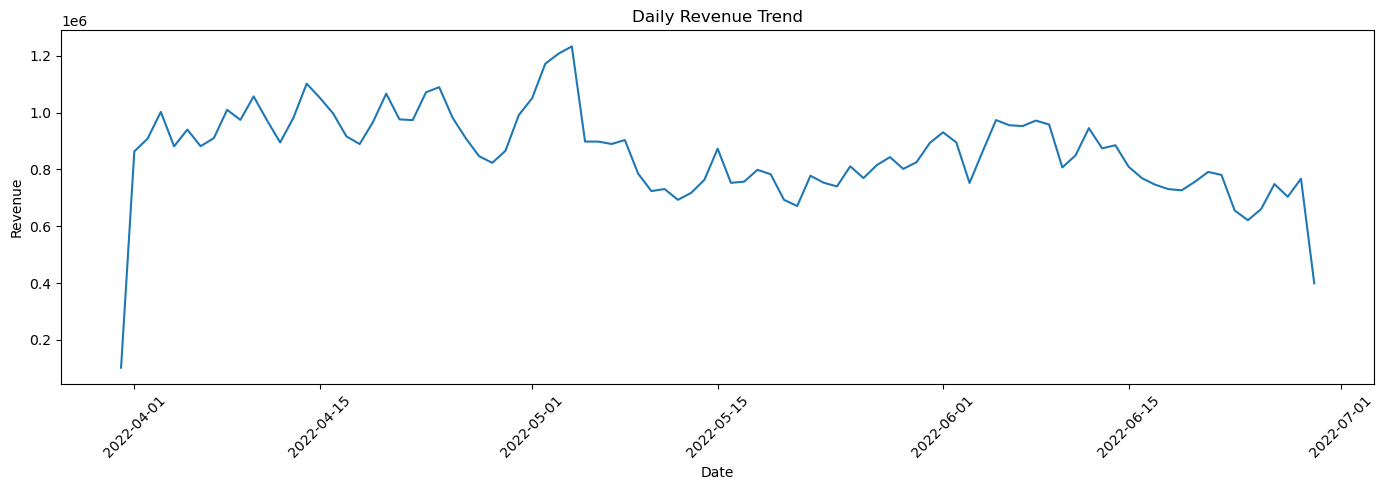

In [30]:
daily_rev = df.groupby('Date')['Amount'].sum().reset_index()

plt.figure(figsize=(14,5))
sns.lineplot(data=daily_rev, x='Date', y='Amount')
plt.title('Daily Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Explanation:
This graph shows how much revenue is generated each day, around 1-3 it the business revenue was high sudenly it decreased.

Conclusion:
Daily revenue is not the same every day. Some days have higher revenue and some days have lower revenue. This shows that customer purchases change daily and sales are not constant.

### Monthly Business Graphs

In [31]:
# Create month-related columns
df['Month'] = df['Date'].dt.to_period('M')
df['Month_start'] = df['Month'].dt.to_timestamp()

In [32]:
monthly = (df.groupby('Month_start').agg(orders=('Order ID', 'nunique'),revenue=('Amount', 'sum'),
                                         avg_order_value=('Amount', 'mean')).reset_index())
monthly

,Month_start,orders,revenue,avg_order_value
0,2022-03-01,158,1.022572e+05,647.197227
1,2022-04-01,45847,2.880311e+07,628.244099
2,2022-05-01,39210,2.602916e+07,663.839873
3,2022-06-01,35135,2.328677e+07,662.779797


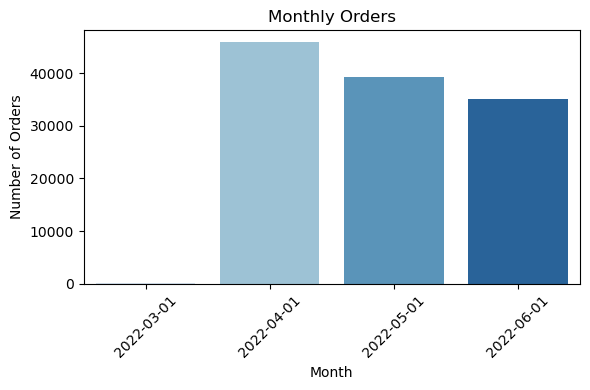

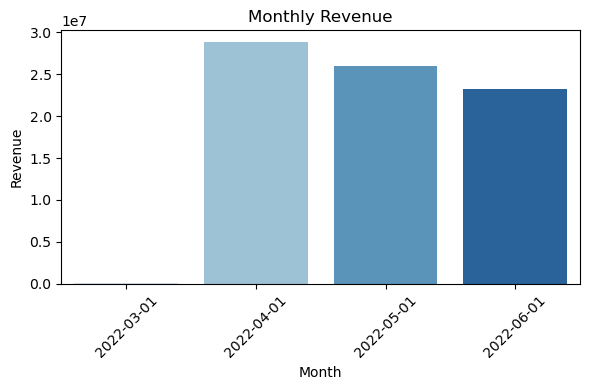

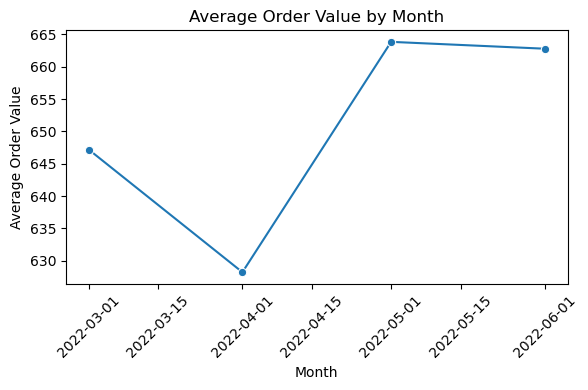

In [33]:
# Monthly orders
plt.figure(figsize=(6,4))
sns.barplot(data=monthly, x='Month_start', y='orders',palette='Blues')
plt.title('Monthly Orders')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Monthly revenue
plt.figure(figsize=(6,4))
sns.barplot(data=monthly, x='Month_start', y='revenue',palette='Blues')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Monthly average order value
plt.figure(figsize=(6,4))
sns.lineplot(data=monthly, x='Month_start', y='avg_order_value', marker='o',palette='Blues')
plt.title('Average Order Value by Month')
plt.xlabel('Month')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Monthly Orders Trend
Explanation:
This graph shows how many orders are coming every month.

Conclusion:
Orders are not same every month. Some months have more orders and some months have less.

#### Monthly Revenue Trend
Explanation:
This graph compares monthly orders and revenue together.

Conclusion:
When orders increase, revenue also increases. Both are mostly moving in the same direction.

#### Average Order Value per Month
Explanation:
This graph shows average amount spent per order every month.

Conclusion:
Customer spending is changing month by month. Some months customers spend more per order.

### Top 10 States by Orders

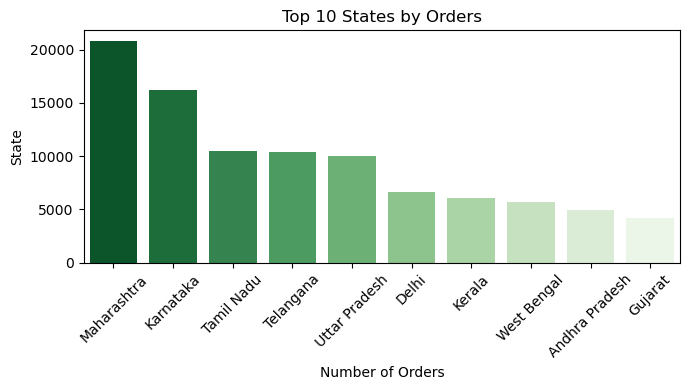

In [34]:
state_orders = (df.groupby('ship-state')['Order ID'].nunique().reset_index(name='orders')
                .sort_values('orders', ascending=False).head(10))

plt.figure(figsize=(7,4))
sns.barplot(data=state_orders, y='orders', x='ship-state',palette='Greens_r')
plt.title('Top 10 States by Orders')
plt.xlabel('Number of Orders')
plt.ylabel('State')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

Explanation:
This graph shows top 10 states with highest number of orders.

Conclusion:
Few states are giving most of the orders. These states are important for business.

### Top 10 States by Revenue

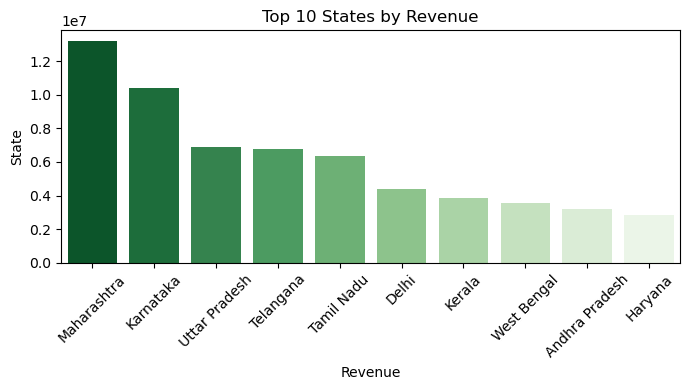

In [35]:
state_revenue = (
    df.groupby('ship-state')['Amount'].sum().reset_index(name='revenue').sort_values('revenue', ascending=False).head(10))

plt.figure(figsize=(7,4))
sns.barplot(data=state_revenue, y='revenue', x='ship-state',palette='Greens_r')
plt.title('Top 10 States by Revenue')
plt.xlabel('Revenue')
plt.ylabel('State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Explanation:
This graph shows top 10 states with highest revenue.

Conclusion:
Some states generate more revenue because of more orders or higher order value.

### Top 10 Cities by Orders

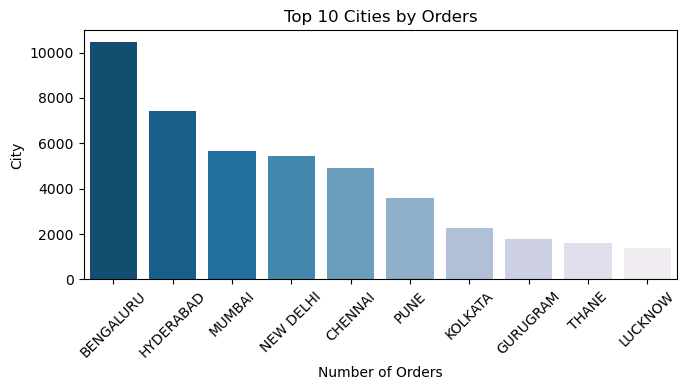

In [36]:
city_orders = (
    df.groupby('ship-city')['Order ID'].nunique().reset_index(name='orders')
      .sort_values('orders', ascending=False).head(10))

plt.figure(figsize=(7,4))
sns.barplot(data=city_orders, y='orders', x='ship-city',palette='PuBu_r')
plt.title('Top 10 Cities by Orders')
plt.xlabel('Number of Orders')
plt.ylabel('City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Explanation:
This graph shows cities from where most orders are coming.

Conclusion:
Major cities have more orders compared to other cities.

In [37]:
## Category wise orders

### Category-wise Orders


        Category  orders
0            Set   47197
1          kurta   45902
2  Western Dress   14712
3            Top   10019
4   Ethnic Dress    1081
5         Blouse     890
6         Bottom     405
7          Saree     143
8        Dupatta       1


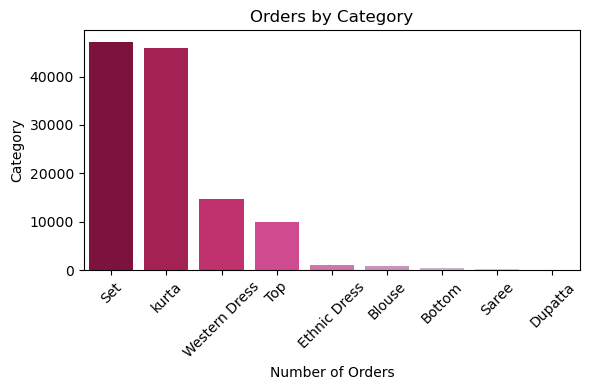

In [38]:
category_orders = (df['Category'].value_counts().reset_index())
category_orders.columns = ['Category', 'orders']
print(category_orders)

plt.figure(figsize=(6,4))
sns.barplot(data=category_orders, y='orders', x='Category',palette='PuRd_r')
plt.title('Orders by Category')
plt.xlabel('Number of Orders')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Explanation:
This graph shows number of orders for each product category.

Conclusion:
Some categories are more popular and receive more orders.

### Category-wise Revenue

        Category       revenue
0         Blouse  4.641924e+05
1         Bottom  1.442323e+05
2        Dupatta  3.050000e+02
3   Ethnic Dress  7.770954e+05
4          Saree  1.151233e+05
5            Set  3.930121e+07
6            Top  5.258713e+06
7  Western Dress  1.121201e+07
8          kurta  2.094842e+07


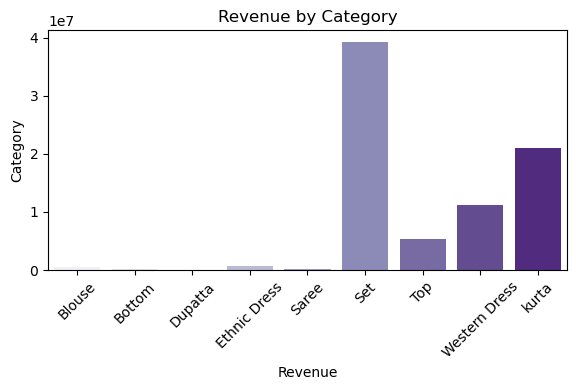

In [39]:
category_revenue = (df.groupby('Category')['Amount'].sum().reset_index(name='revenue'))
print(category_revenue)
plt.figure(figsize=(6,4))
sns.barplot(data=category_revenue, y='revenue', x='Category',palette='Purples')
plt.title('Revenue by Category')
plt.xticks(rotation=45)
plt.xlabel('Revenue')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


Explanation:
This graph shows revenue generated by each category.

Conclusion:
Some categories earn more revenue even if order count is less.

### Order Amount Distribution


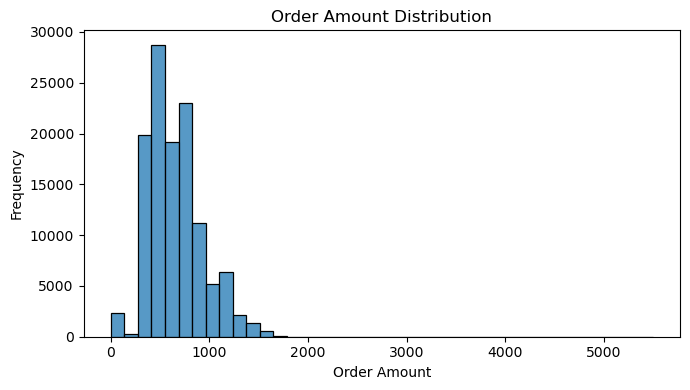

In [40]:
plt.figure(figsize=(7,4))
sns.histplot(df['Amount'], bins=40)
plt.title('Order Amount Distribution')
plt.xlabel('Order Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Explanation:
This graph shows how order amounts are spread.

Conclusion:
Most orders are in a common price range. Few orders are very high value.

### Courier Status Distribution


  Courier Status   count
0        Shipped  102157
1    Not Updated    6385
2      Unshipped    6186
3      Cancelled    5622


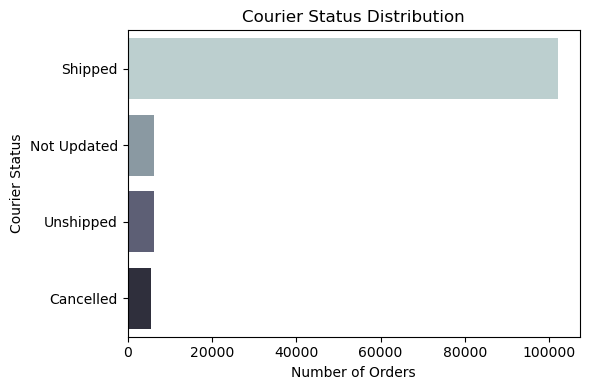

In [41]:
courier_status = (df['Courier Status'].value_counts().reset_index())
courier_status.columns = ['Courier Status', 'count']
print(courier_status)

plt.figure(figsize=(6,4))
sns.barplot(data=courier_status, x='count', y='Courier Status',palette='bone_r')
plt.title('Courier Status Distribution')
plt.xlabel('Number of Orders')
plt.ylabel('Courier Status')
plt.tight_layout()
plt.show()

Explanation:
This graph shows delivery status of orders.

Conclusion:
Most orders are delivered successfully. Few orders are cancelled or returned.

### Courier Status Distribution


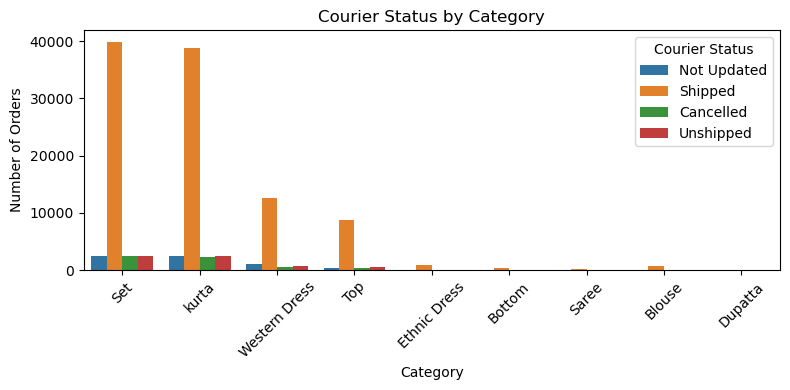

In [42]:
# Courier status by category
plt.figure(figsize=(8 ,4))
sns.countplot(data=df, x='Category', hue='Courier Status')
plt.title('Courier Status by Category')
plt.xlabel('Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()


Explanation:
This graph shows delivery status of orders.

Conclusion:
Most orders are delivered successfully. Few orders are cancelled or returned.

### B2B and non B2B orders


     B2B   count
0  False  119556
1   True     794


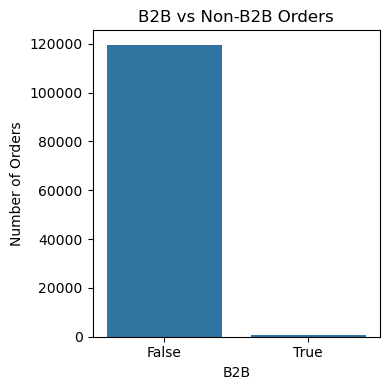

In [43]:
# B2B and non B2B orders
b2b_orders = (df['B2B'].value_counts().reset_index())
b2b_orders.columns = ['B2B', 'count']
print(b2b_orders)

plt.figure(figsize=(4,4))
sns.barplot(data=b2b_orders, x='B2B', y='count')
plt.title('B2B vs Non-B2B Orders')
plt.xlabel('B2B')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

Explanation:
This graph compares B2B and non-B2B orders.

Conclusion:
Most orders are non-B2B, which means individual customers are more.

### Orders by Fulfillment Type

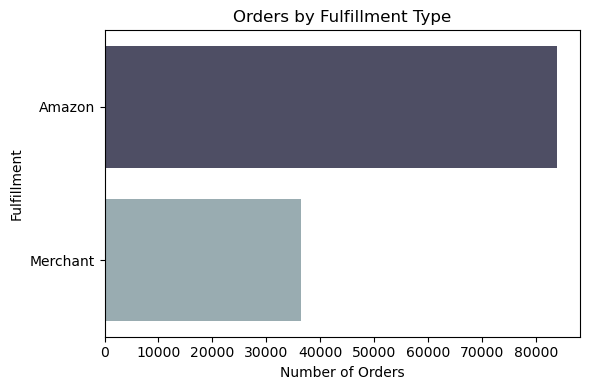

In [44]:
fulfillment_counts = (
    df['Fulfilment']
    .value_counts()
    .reset_index()
)
fulfillment_counts.columns = ['Fulfilment', 'orders']

plt.figure(figsize=(6,4))
sns.barplot(data=fulfillment_counts, x='orders', y='Fulfilment',palette='bone')
plt.title('Orders by Fulfillment Type')
plt.xlabel('Number of Orders')
plt.ylabel('Fulfillment')
plt.tight_layout()
plt.show()

Explanation:
This graph shows how orders are fulfilled using different fulfillment methods.

Conclusion:
Most orders are fulfilled using one main fulfillment type, while other methods are used less.

### Average Order Value by Category

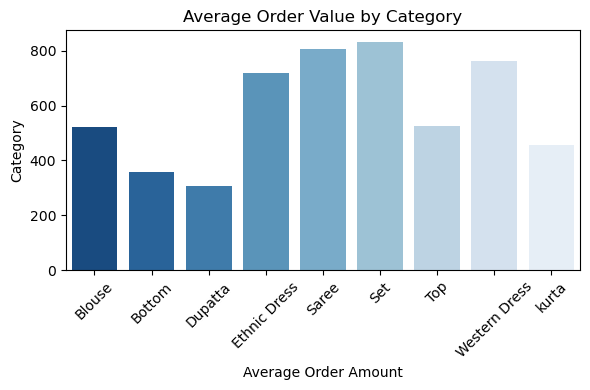

In [45]:
category_aov = (df.groupby('Category')['Amount'].mean().reset_index(name='avg_order_value'))

plt.figure(figsize=(6,4))
sns.barplot(data=category_aov, y='avg_order_value', x='Category',palette='Blues_r')
plt.title('Average Order Value by Category')
plt.xlabel('Average Order Amount')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Explanation

This graph shows the average amount spent per order for each product category.

Conclusion

Some categories have higher average order value. This means customers spend more money per order in those categories compared to others.

# Machine Learning

### Selecting columns for machine learning

In [46]:
ml_df = df[['Qty', 'Category', 'Sales Channel', 'Fulfilment', 'B2B', 'Amount']]
ml_df

,Qty,Category,Sales Channel,Fulfilment,B2B,Amount
0,0,Set,Amazon.in,Merchant,False,647.62
1,1,kurta,Amazon.in,Merchant,False,406.00
2,1,kurta,Amazon.in,Amazon,True,329.00
3,0,Western Dress,Amazon.in,Merchant,False,753.33
4,1,Top,Amazon.in,Amazon,False,574.00
...,...,...,...,...,...,...
128970,1,kurta,Amazon.in,Amazon,False,517.00
128971,1,Set,Amazon.in,Amazon,False,999.00
128972,1,Western Dress,Amazon.in,Amazon,False,690.00
128973,1,Set,Amazon.in,Amazon,False,1199.00


### Encoding using one-hot encoder

In [47]:
ml_df_encoded = pd.get_dummies(ml_df,columns=['Category', 'Sales Channel', 'Fulfilment'],drop_first=True)
ml_df_encoded

,Qty,B2B,Amount,Category_Bottom,Category_Dupatta,Category_Ethnic Dress,Category_Saree,Category_Set,Category_Top,Category_Western Dress,Category_kurta,Sales Channel_Non-Amazon,Fulfilment_Merchant
0,0,False,647.62,False,False,False,False,True,False,False,False,False,True
1,1,False,406.00,False,False,False,False,False,False,False,True,False,True
2,1,True,329.00,False,False,False,False,False,False,False,True,False,False
3,0,False,753.33,False,False,False,False,False,False,True,False,False,True
4,1,False,574.00,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,1,False,517.00,False,False,False,False,False,False,False,True,False,False
128971,1,False,999.00,False,False,False,False,True,False,False,False,False,False
128972,1,False,690.00,False,False,False,False,False,False,True,False,False,False
128973,1,False,1199.00,False,False,False,False,True,False,False,False,False,False


### Feature selection

In [48]:
x = ml_df_encoded.drop('Amount', axis=1)
y = ml_df_encoded['Amount']

### Train–Test Split

In [49]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)

### Linear Regression

In [50]:
# Training model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [51]:
# Predict on Test data
y_pred_lr = lr.predict(x_test)
y_pred_lr

array([841.48047053, 463.78822862, 790.85564969, ..., 758.16424651,
       463.78822862, 826.93214886])

In [52]:
from sklearn.metrics import r2_score

print("Linear Regression R2:", r2_score(y_test, y_pred_lr))

Linear Regression R2: 0.40462096134436654


### Random Forest Regressor

In [70]:
from sklearn.ensemble import RandomForestRegressor
# Training
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [68]:
# predicting test data
y_pred_rf = rf.predict(x_test)
y_pred_rf

array([837.38179092, 456.71445574, 796.88767747, ..., 740.92071147,
       456.71445574, 824.23513266])

In [69]:
print("Random Forest R2:", r2_score(y_test, y_pred_rf))

Random Forest R2: 0.41512012118834585


### Decision Tree Regressor

In [56]:
from sklearn.tree import DecisionTreeRegressor
# Training 
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [57]:
# Predicting test data
y_pred_dt = dt.predict(x_test)
y_pred_dt

array([837.33338754, 456.72319769, 796.95043888, ..., 740.90875491,
       456.72319769, 824.10032254])

In [58]:
print("Decision Tree R2:", r2_score(y_test, y_pred_dt))

Decision Tree R2: 0.4156166481150927


### KNN Regressor

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
ss=StandardScaler()
x_scaled=ss.fit_transform(x)

In [60]:
x_scaled

array([[-2.88702568, -0.0814938 , -0.05810807, ..., -0.78521626,
        -0.03211527,  1.51973416],
       [ 0.30794941, -0.0814938 , -0.05810807, ...,  1.2735345 ,
        -0.03211527,  1.51973416],
       [ 0.30794941, 12.27087231, -0.05810807, ...,  1.2735345 ,
        -0.03211527, -0.65800982],
       ...,
       [ 0.30794941, -0.0814938 , -0.05810807, ..., -0.78521626,
        -0.03211527, -0.65800982],
       [ 0.30794941, -0.0814938 , -0.05810807, ..., -0.78521626,
        -0.03211527, -0.65800982],
       [ 0.30794941, -0.0814938 , -0.05810807, ..., -0.78521626,
        -0.03211527, -0.65800982]])

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(y_test.shape)

(96280, 12)
(24070,)


In [62]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [63]:
y_pred_knn=knn.predict(x_test)
y_pred_knn

array([954.6       , 438.4       , 780.05311768, ..., 846.4       ,
       438.4       , 888.2       ])

In [64]:
print("KNN r2 score:",r2_score(y_test,y_pred_knn))

KNN r2 score: 0.3391192831692551


In [65]:
x_scaled[8965]

array([ 0.30794941, -0.0814938 , -0.05810807, -0.00288256, -0.09520265,
       -0.03449079,  1.24496996, -0.3013446 , -0.37318637, -0.78521626,
       -0.03211527, -0.65800982])

In [66]:
new=knn.predict([[ 0.30794941, -0.0814938 , -0.05810807, -0.00288256, -0.09520265,
       -0.03449079,  1.24496996, -0.3013446 , -0.37318637, -0.78521626,
       -0.03211527, -0.65800982]])
print("Predicting of amount is:",new)

Predicting of amount is: [960.8]


In [74]:
x.iloc[8965]

Qty                             1
B2B                         False
Category_Bottom             False
Category_Dupatta            False
Category_Ethnic Dress       False
Category_Saree              False
Category_Set                 True
Category_Top                False
Category_Western Dress      False
Category_kurta              False
Sales Channel_Non-Amazon    False
Fulfilment_Merchant         False
Name: 9559, dtype: object

In [76]:
new1=dt.predict([x.iloc[8965]])
print("Predicting of amount is:",new1)

Predicting of amount is: [837.33338754]
